<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#MNIST-GAN" data-toc-modified-id="MNIST-GAN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MNIST GAN</a></span></li><li><span><a href="#MNIST-WGAN" data-toc-modified-id="MNIST-WGAN-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MNIST WGAN</a></span></li><li><span><a href="#RADAR-GAN" data-toc-modified-id="RADAR-GAN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>RADAR GAN</a></span></li><li><span><a href="#RADAR-WGAN" data-toc-modified-id="RADAR-WGAN-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>RADAR WGAN</a></span></li><li><span><a href="#Old" data-toc-modified-id="Old-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Old</a></span></li></ul></div>

In [1]:
#%load_ext autoreload
#%autoreload 2
#%matplotlib inline

In [2]:
from importlib import reload
import models; reload(models)
from models.GAN import GAN
from models.models import *
from models.train import *
from models.utils import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

Using TensorFlow backend.


In [3]:
limit_mem()

## MNIST GAN

In [4]:
for i, fn in enumerate(sorted(glob('./images/mnist1*'))):
    print('Epoch:', i + 1)
    img = Image.open(fn)
    plt.imshow(img, cmap='gray'); plt.show()

## MNIST WGAN

In [5]:
mnist_gan = GAN(exp_id='mnist_w', wasserstein=True, verbose=0)

In [6]:
mnist_gan.load_data('mnist')

Train samples: 60000 Test samples: 10000


In [7]:
mnist_gan.create_generator(filters=[128, 64], first_conv_size=7, activation='LeakyReLU',
                           bn=True)

In [12]:
mnist_gan.create_discriminator(filters=[64, 128], strides=[2, 2], dr=0.,
                               activation='LeakyReLU', bn=1)

In [9]:
mnist_gan.compile()

In [10]:
mnist_gan.G.summary()
mnist_gan.D.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6272)              25088     
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       409728    
__________

In [11]:
mnist_gan.save_models()

In [ ]:
mnist_gan.train(1, 128, train_D_separately=True)

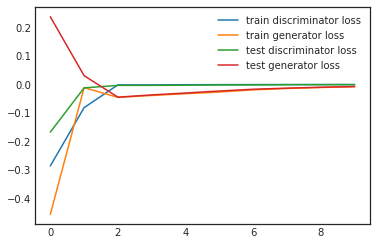

In [10]:
plot_losses(mnist_gan.train_history)

Epoch: 1


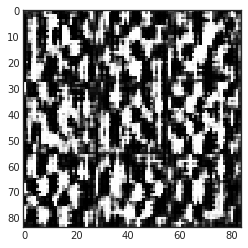

Epoch: 2


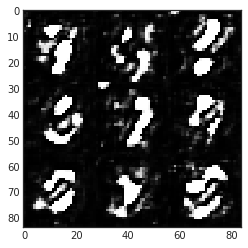

Epoch: 3


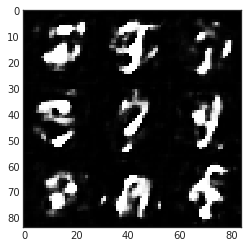

Epoch: 4


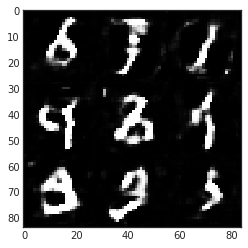

Epoch: 5


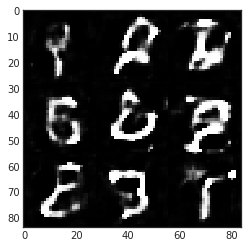

Epoch: 6


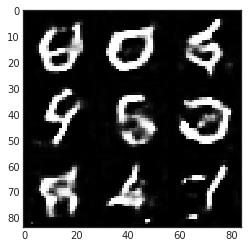

Epoch: 7


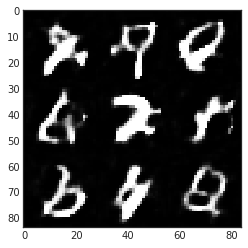

Epoch: 8


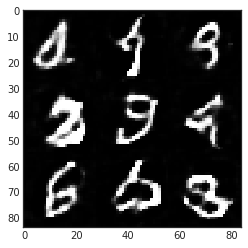

Epoch: 9


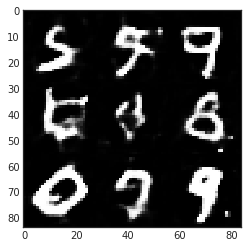

Epoch: 10


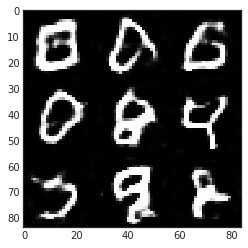

In [11]:
for i, fn in enumerate(sorted(glob('./images/mnist_w*'))):
    print('Epoch:', i + 1)
    img = Image.open(fn)
    plt.imshow(img, cmap='gray'); plt.show()

In [12]:
mnist_gan.save_models()

AttributeError: 'LeakyReLU' object has no attribute '__name__'

In [14]:
Activation('relu')

## RADAR GAN

In [11]:
radar_gan = GAN(image_size=32, exp_id='radar1')

In [12]:
radar_gan.load_data('radar', normalize=True, halve_radar=True)

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


In [13]:
radar_gan.create_generator(filters=[128, 64], first_conv_size=8, final_activation='sigmoid',
                           activation='LeakyReLU', bn=True)

/home/s/S.Rasp/.conda/envs/cbrain_gpu/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [14]:
radar_gan.create_discriminator(filters=[64, 128], strides=[2, 2], activation='LeakyReLU', 
                               bn=True)

/home/s/S.Rasp/.conda/envs/cbrain_gpu/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [15]:
radar_gan.compile()

In [16]:
radar_gan.G.summary()
radar_gan.D.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_5 (Batch (None, 8192)              32768     
_________________________________________________________________
reshape_2 (Reshape)          (None, 8, 8, 128)         0         
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       409728    
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 128)       512       
__________

In [29]:
radar_gan.train(10, 100, train_D_separately=True)


 28%|██▊       | 126/450 [00:33<01:23,  3.89it/s, train_discriminator_loss=0.795, train_generator_loss=0.879, test_discriminator_loss=0.693, test_generator_loss=0.767]


 49%|████▉     | 220/450 [00:58<00:53,  4.32it/s, train_discriminator_loss=0.79, train_generator_loss=0.862, test_discriminator_loss=0.695, test_generator_loss=0.777]


 69%|██████▉   | 312/450 [01:22<00:31,  4.33it/s, train_discriminator_loss=0.761, train_generator_loss=0.851, test_discriminator_loss=0.698, test_generator_loss=0.841]


 90%|█████████ | 405/450 [01:48<00:11,  3.97it/s, train_discriminator_loss=0.765, train_generator_loss=0.822, test_discriminator_loss=0.699, test_generator_loss=0.824]


100%|██████████| 450/450 [02:02<00:00,  4.01it/s, train_discriminator_loss=0.752, train_generator_loss=0.867, test_discriminator_loss=0.695, test_generator_loss=0.767]


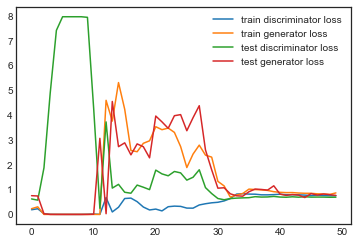

In [30]:
plot_losses(radar_gan.train_history)

Epoch: 1


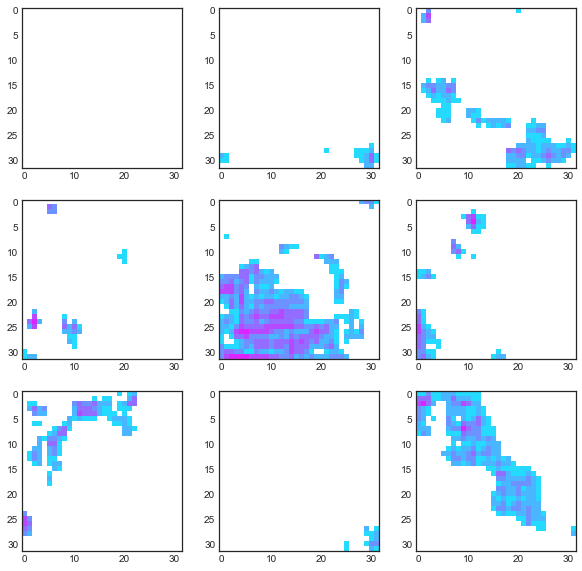

Epoch: 2


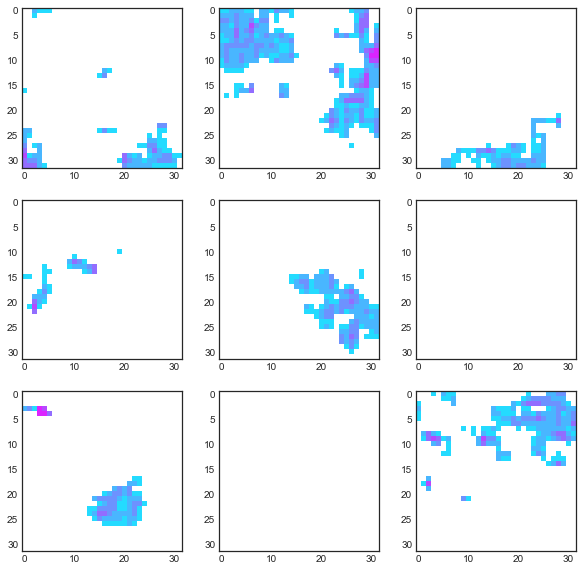

Epoch: 3


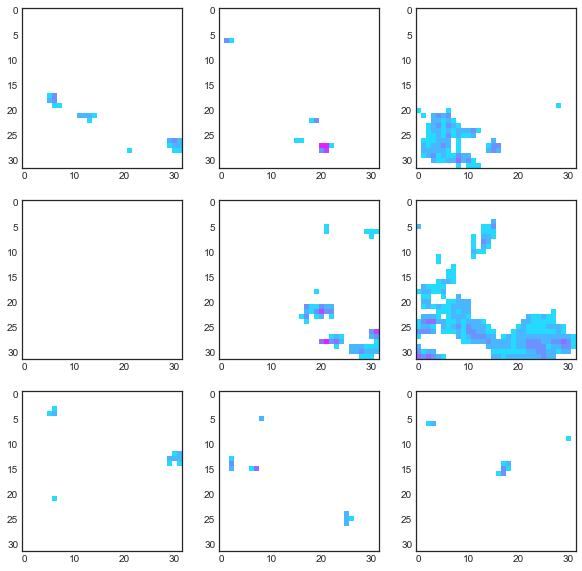

Epoch: 4


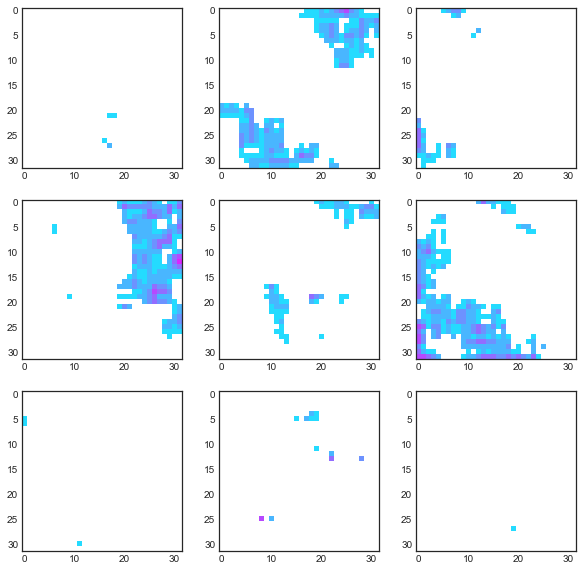

Epoch: 5


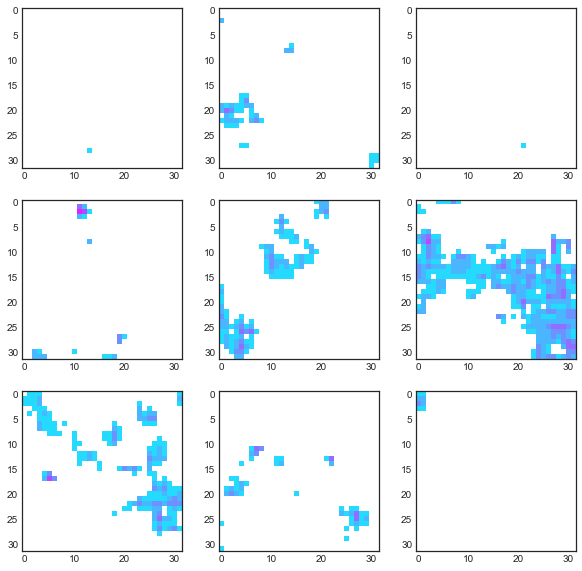

Epoch: 6


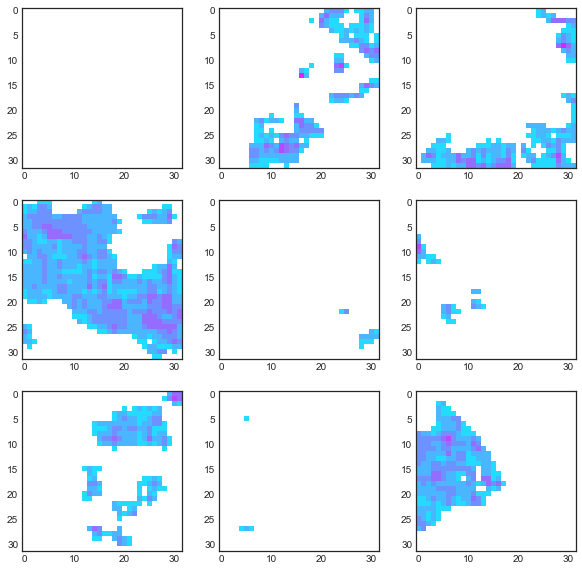

Epoch: 7


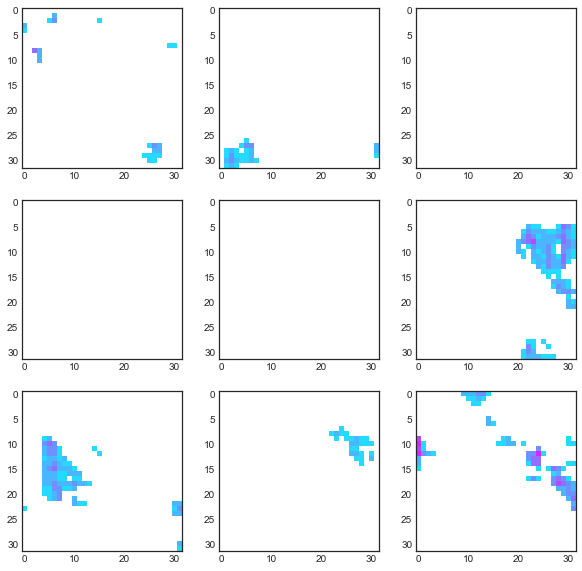

Epoch: 8


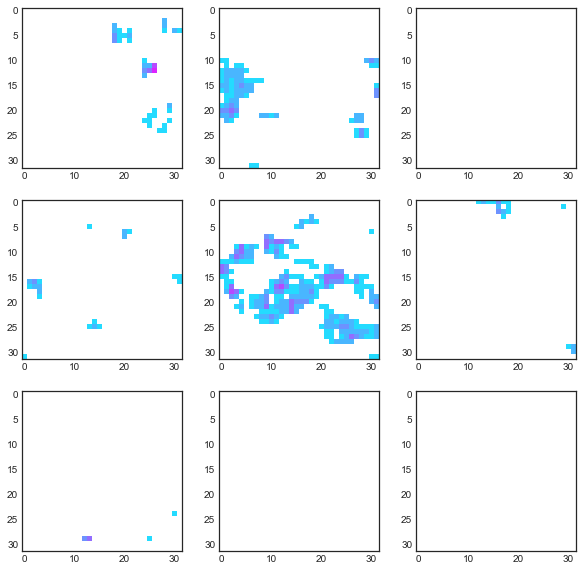

Epoch: 9


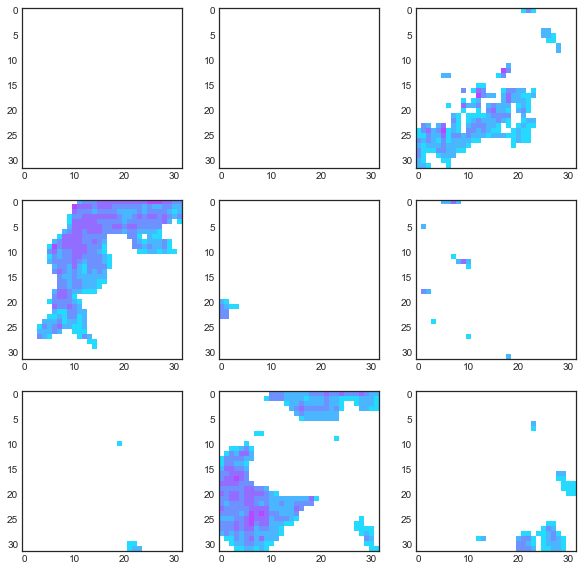

Epoch: 10


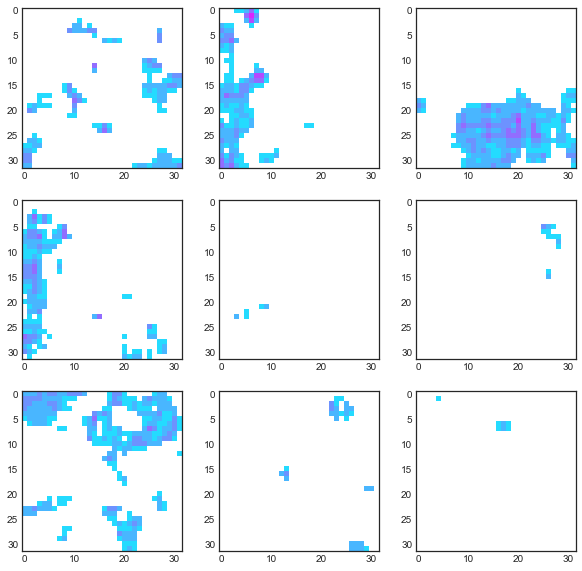

In [31]:
for i, fn in enumerate(sorted(glob('./images/radar1*.npy'))[-10:]):
    print('Epoch:', i + 1)
    plot_stamps(np.squeeze(np.load(fn)), normalize=True)

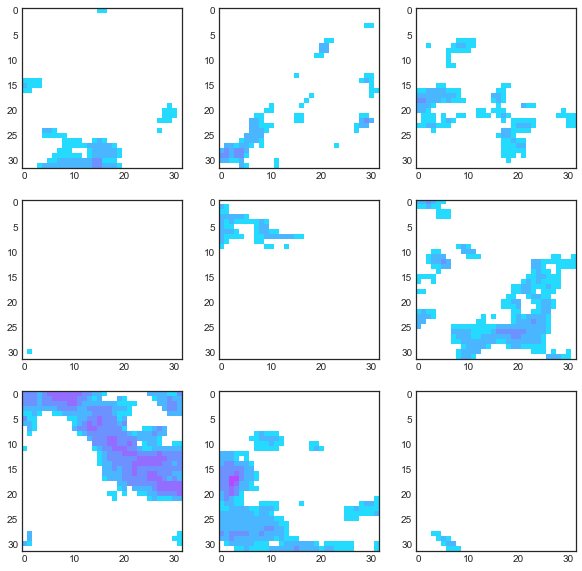

In [32]:
plot_stamps(np.squeeze(radar_gan.X_test), normalize=True)

## RADAR WGAN

In [33]:
radar_wgan = GAN(image_size=32, exp_id='radar2', wasserstein=True)

In [34]:
radar_wgan.load_data('radar', normalize=True, halve_radar=True)

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


In [35]:
radar_wgan.create_generator(filters=[128, 64], first_conv_size=8, final_activation='sigmoid',
                           activation='LeakyReLU', bn=True)

/home/s/S.Rasp/.conda/envs/cbrain_gpu/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [36]:
radar_wgan.create_discriminator(filters=[64, 128], strides=[2, 2], activation='LeakyReLU', 
                               bn=True, final_activation='linear')

/home/s/S.Rasp/.conda/envs/cbrain_gpu/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [37]:
radar_wgan.compile()

In [44]:
radar_wgan.train(50, 100, train_D_separately=True)


  5%|▌         | 122/2250 [01:19<22:40,  1.56it/s, train_discriminator_loss=-0.0483, train_generator_loss=0.107, test_discriminator_loss=-0.0604, test_generator_loss=0.0874]


  9%|▉         | 212/2250 [02:21<16:35,  2.05it/s, train_discriminator_loss=-0.0412, train_generator_loss=0.0962, test_discriminator_loss=-0.0495, test_generator_loss=0.0723]


 13%|█▎        | 302/2250 [03:09<16:43,  1.94it/s, train_discriminator_loss=-0.0377, train_generator_loss=0.0852, test_discriminator_loss=-0.0482, test_generator_loss=0.0415]


 17%|█▋        | 392/2250 [04:00<16:12,  1.91it/s, train_discriminator_loss=-0.0323, train_generator_loss=0.0721, test_discriminator_loss=-0.0414, test_generator_loss=0.0416]


 21%|██▏       | 482/2250 [04:50<15:49,  1.86it/s, train_discriminator_loss=-0.0275, train_generator_loss=0.0613, test_discriminator_loss=-0.0408, test_generator_loss=0.0316]


 25%|██▌       | 572/2250 [05:43<16:35,  1.69it/s, train_discriminator_loss=-0.0252, train_generator_loss=0.0529, test_discriminator_loss=-0.0362, test_generator_loss=0.0338]


 29%|██▉       | 662/2250 [06:39<14:59,  1.77it/s, train_discriminator_loss=-0.0287, train_generator_loss=0.0605, test_discriminator_loss=-0.0426, test_generator_loss=0.048]


 33%|███▎      | 752/2250 [07:28<12:42,  1.96it/s, train_discriminator_loss=-0.0281, train_generator_loss=0.056, test_discriminator_loss=-0.0407, test_generator_loss=0.0561]


 37%|███▋      | 842/2250 [08:14<11:32,  2.03it/s, train_discriminator_loss=-0.0254, train_generator_loss=0.0477, test_discriminator_loss=-0.04, test_generator_loss=0.0518]


 41%|████▏     | 932/2250 [09:01<10:38,  2.06it/s, train_discriminator_loss=-0.0233, train_generator_loss=0.04, test_discriminator_loss=-0.0383, test_generator_loss=0.0461]


 45%|████▌     | 1021/2250 [09:47<10:04,  2.03it/s, train_discriminator_loss=-0.0231, train_generator_loss=0.0339, test_discriminator_loss=-0.0391, test_generator_loss=0.0398]


 49%|████▉     | 1109/2250 [10:32<09:14,  2.06it/s, train_discriminator_loss=-0.0218, train_generator_loss=0.0254, test_discriminator_loss=-0.0271, test_generator_loss=0.0319]


 53%|█████▎    | 1197/2250 [11:24<08:48,  1.99it/s, train_discriminator_loss=-0.0194, train_generator_loss=0.0189, test_discriminator_loss=-0.0319, test_generator_loss=0.0181]


 57%|█████▋    | 1285/2250 [12:09<07:49,  2.06it/s, train_discriminator_loss=-0.0167, train_generator_loss=0.0138, test_discriminator_loss=-0.0239, test_generator_loss=0.00955]


 61%|██████    | 1373/2250 [12:54<07:08,  2.05it/s, train_discriminator_loss=-0.0151, train_generator_loss=0.00506, test_discriminator_loss=-0.0209, test_generator_loss=0.00239]


 65%|██████▍   | 1461/2250 [13:40<06:24,  2.05it/s, train_discriminator_loss=-0.0136, train_generator_loss=-0.000548, test_discriminator_loss=-0.0206, test_generator_loss=-0.00374]


 69%|██████▉   | 1548/2250 [14:25<05:46,  2.02it/s, train_discriminator_loss=-0.0119, train_generator_loss=-0.00671, test_discriminator_loss=-0.0125, test_generator_loss=-0.0153]


 73%|███████▎  | 1636/2250 [15:11<05:08,  1.99it/s, train_discriminator_loss=-0.0104, train_generator_loss=-0.0134, test_discriminator_loss=-0.0201, test_generator_loss=-0.0157]


 77%|███████▋  | 1724/2250 [16:06<04:29,  1.95it/s, train_discriminator_loss=-0.00895, train_generator_loss=-0.0205, test_discriminator_loss=-0.0116, test_generator_loss=-0.0303]


 81%|████████  | 1812/2250 [16:57<03:49,  1.91it/s, train_discriminator_loss=-0.00836, train_generator_loss=-0.0244, test_discriminator_loss=-0.0103, test_generator_loss=-0.0373]


 84%|████████▍ | 1899/2250 [17:44<03:07,  1.88it/s, train_discriminator_loss=-0.00796, train_generator_loss=-0.0287, test_discriminator_loss=-0.00766, test_generator_loss=-0.0509]


 88%|████████▊ | 1985/2250 [18:31<02:39,  1.67it/s, train_discriminator_loss=-0.00564, train_generator_loss=-0.037, test_discriminator_loss=-0.0107, test_generator_loss=-0.0418]


 92%|█████████▏| 2073/2250 [19:18<02:02,  1.44it/s, train_discriminator_loss=-0.00595, train_generator_loss=-0.0347, test_discriminator_loss=-0.00741, test_generator_loss=-0.0458]


 96%|█████████▌| 2160/2250 [20:11<00:55,  1.61it/s, train_discriminator_loss=-0.00465, train_generator_loss=-0.0354, test_discriminator_loss=-0.00851, test_generator_loss=-0.0413]


100%|█████████▉| 2246/2250 [20:57<00:02,  1.94it/s, train_discriminator_loss=-0.00378, train_generator_loss=-0.0353, test_discriminator_loss=-0.00445, test_generator_loss=-0.0469]


100%|██████████| 2250/2250 [21:01<00:00,  1.94it/s, train_discriminator_loss=-0.00524, train_generator_loss=-0.031, test_discriminator_loss=-0.00786, test_generator_loss=-0.0339] 


In [45]:
radar_wgan.train(100, 100, train_D_separately=True)


  3%|▎         | 120/4500 [01:08<43:03,  1.70it/s, train_discriminator_loss=-0.00478, train_generator_loss=-0.0317, test_discriminator_loss=-0.00716, test_generator_loss=-0.0354]


  5%|▍         | 206/4500 [02:02<42:23,  1.69it/s, train_discriminator_loss=-0.00326, train_generator_loss=-0.0334, test_discriminator_loss=-0.00472, test_generator_loss=-0.0385]


  6%|▋         | 292/4500 [02:55<41:44,  1.68it/s, train_discriminator_loss=-0.00375, train_generator_loss=-0.0317, test_discriminator_loss=-0.00449, test_generator_loss=-0.0377]


  8%|▊         | 378/4500 [03:49<41:09,  1.67it/s, train_discriminator_loss=-0.00297, train_generator_loss=-0.0328, test_discriminator_loss=-0.00527, test_generator_loss=-0.0346]


 10%|█         | 465/4500 [04:51<39:34,  1.70it/s, train_discriminator_loss=-0.00313, train_generator_loss=-0.03, test_discriminator_loss=-0.00429, test_generator_loss=-0.0342]


 12%|█▏        | 553/4500 [05:46<39:36,  1.66it/s, train_discriminator_loss=-0.00218, train_generator_loss=-0.0317, test_discriminator_loss=-0.00256, test_generator_loss=-0.0357]


 14%|█▍        | 639/4500 [06:40<39:43,  1.62it/s, train_discriminator_loss=-0.00271, train_generator_loss=-0.0295, test_discriminator_loss=-0.00317, test_generator_loss=-0.0315]


 16%|█▌        | 727/4500 [07:34<40:04,  1.57it/s, train_discriminator_loss=-0.00159, train_generator_loss=-0.0296, test_discriminator_loss=-0.000936, test_generator_loss=-0.0335]


 18%|█▊        | 814/4500 [08:29<44:36,  1.38it/s, train_discriminator_loss=-0.00212, train_generator_loss=-0.0269, test_discriminator_loss=-0.00419, test_generator_loss=-0.0259]


 20%|██        | 902/4500 [09:30<2:58:51,  2.98s/it, train_discriminator_loss=-0.00168, train_generator_loss=-0.0253, test_discriminator_loss=-0.00417, test_generator_loss=-0.0215]


 22%|██▏       | 990/4500 [10:24<35:02,  1.67it/s, train_discriminator_loss=-0.00197, train_generator_loss=-0.025, test_discriminator_loss=-0.00136, test_generator_loss=-0.0252]


 24%|██▍       | 1076/4500 [11:17<33:43,  1.69it/s, train_discriminator_loss=-0.00197, train_generator_loss=-0.0223, test_discriminator_loss=-0.00119, test_generator_loss=-0.0257]


 26%|██▌       | 1162/4500 [12:11<32:34,  1.71it/s, train_discriminator_loss=-0.00164, train_generator_loss=-0.0207, test_discriminator_loss=-0.00169, test_generator_loss=-0.0223]


 28%|██▊       | 1249/4500 [13:05<31:58,  1.69it/s, train_discriminator_loss=-0.0015, train_generator_loss=-0.0202, test_discriminator_loss=0.00206, test_generator_loss=-0.0283]


 30%|██▉       | 1337/4500 [14:00<31:04,  1.70it/s, train_discriminator_loss=-0.00173, train_generator_loss=-0.0186, test_discriminator_loss=0.000821, test_generator_loss=-0.026]


 32%|███▏      | 1423/4500 [15:01<29:55,  1.71it/s, train_discriminator_loss=-0.00129, train_generator_loss=-0.0183, test_discriminator_loss=-0.00279, test_generator_loss=-0.0164]


 34%|███▎      | 1509/4500 [15:54<28:43,  1.74it/s, train_discriminator_loss=-0.00091, train_generator_loss=-0.0226, test_discriminator_loss=-0.00228, test_generator_loss=-0.0212]


 35%|███▌      | 1595/4500 [16:48<29:06,  1.66it/s, train_discriminator_loss=-0.00107, train_generator_loss=-0.0195, test_discriminator_loss=-0.00132, test_generator_loss=-0.019]


 37%|███▋      | 1681/4500 [17:41<27:57,  1.68it/s, train_discriminator_loss=-0.00106, train_generator_loss=-0.0181, test_discriminator_loss=-0.00316, test_generator_loss=-0.0138]


 39%|███▉      | 1767/4500 [18:35<27:11,  1.67it/s, train_discriminator_loss=-0.000947, train_generator_loss=-0.0166, test_discriminator_loss=-0.00177, test_generator_loss=-0.0167]


 41%|████      | 1853/4500 [19:29<27:41,  1.59it/s, train_discriminator_loss=-0.000943, train_generator_loss=-0.0153, test_discriminator_loss=-0.00339, test_generator_loss=-0.0109]


 43%|████▎     | 1939/4500 [20:29<31:16,  1.36it/s, train_discriminator_loss=-0.00102, train_generator_loss=-0.019, test_discriminator_loss=-0.000572, test_generator_loss=-0.0167]


 45%|████▌     | 2025/4500 [21:24<24:24,  1.69it/s, train_discriminator_loss=-0.000646, train_generator_loss=-0.0154, test_discriminator_loss=-0.00162, test_generator_loss=-0.0137]


 47%|████▋     | 2112/4500 [22:16<23:42,  1.68it/s, train_discriminator_loss=-0.000568, train_generator_loss=-0.0142, test_discriminator_loss=0.000999, test_generator_loss=-0.0184]


 49%|████▉     | 2198/4500 [23:09<22:37,  1.70it/s, train_discriminator_loss=-0.000979, train_generator_loss=-0.0139, test_discriminator_loss=0.00152, test_generator_loss=-0.0206]


 51%|█████     | 2284/4500 [24:03<21:47,  1.70it/s, train_discriminator_loss=-0.000586, train_generator_loss=-0.0131, test_discriminator_loss=0.00224, test_generator_loss=-0.0207]


 53%|█████▎    | 2370/4500 [24:57<20:59,  1.69it/s, train_discriminator_loss=-0.000557, train_generator_loss=-0.0121, test_discriminator_loss=-0.00258, test_generator_loss=-0.00925]


 55%|█████▍    | 2456/4500 [25:57<20:20,  1.67it/s, train_discriminator_loss=-0.000511, train_generator_loss=-0.0123, test_discriminator_loss=-0.00105, test_generator_loss=-0.0133]


 56%|█████▋    | 2542/4500 [26:51<19:09,  1.70it/s, train_discriminator_loss=-0.000461, train_generator_loss=-0.0116, test_discriminator_loss=0.00223, test_generator_loss=-0.0186]


 58%|█████▊    | 2628/4500 [27:45<18:14,  1.71it/s, train_discriminator_loss=-0.000512, train_generator_loss=-0.0111, test_discriminator_loss=-0.00225, test_generator_loss=-0.00822]


 60%|██████    | 2714/4500 [28:39<17:39,  1.69it/s, train_discriminator_loss=-0.000351, train_generator_loss=-0.0112, test_discriminator_loss=-0.00183, test_generator_loss=-0.00813]


 62%|██████▏   | 2800/4500 [29:32<17:00,  1.67it/s, train_discriminator_loss=-0.000462, train_generator_loss=-0.0103, test_discriminator_loss=-0.00113, test_generator_loss=-0.0105]


 64%|██████▍   | 2886/4500 [30:26<17:53,  1.50it/s, train_discriminator_loss=-0.000309, train_generator_loss=-0.0102, test_discriminator_loss=0.00255, test_generator_loss=-0.0172]


 66%|██████▌   | 2972/4500 [31:27<22:19,  1.14it/s, train_discriminator_loss=-0.000294, train_generator_loss=-0.0085, test_discriminator_loss=0.00123, test_generator_loss=-0.0132]


 68%|██████▊   | 3058/4500 [32:19<14:16,  1.68it/s, train_discriminator_loss=-0.000258, train_generator_loss=-0.00899, test_discriminator_loss=-0.000788, test_generator_loss=-0.00951]


 70%|██████▉   | 3143/4500 [33:12<13:12,  1.71it/s, train_discriminator_loss=-0.000344, train_generator_loss=-0.00865, test_discriminator_loss=-0.000777, test_generator_loss=-0.00995]


 72%|███████▏  | 3229/4500 [34:05<12:30,  1.69it/s, train_discriminator_loss=-0.00025, train_generator_loss=-0.00836, test_discriminator_loss=-0.000862, test_generator_loss=-0.00998]


 74%|███████▎  | 3315/4500 [34:59<11:44,  1.68it/s, train_discriminator_loss=-0.000242, train_generator_loss=-0.00847, test_discriminator_loss=-0.001, test_generator_loss=-0.00797]


 76%|███████▌  | 3401/4500 [35:53<10:57,  1.67it/s, train_discriminator_loss=-0.000244, train_generator_loss=-0.00879, test_discriminator_loss=0.00115, test_generator_loss=-0.0133]


 77%|███████▋  | 3487/4500 [36:54<10:03,  1.68it/s, train_discriminator_loss=-7.66e-05, train_generator_loss=-0.0089, test_discriminator_loss=0.000814, test_generator_loss=-0.0124]


 79%|███████▉  | 3573/4500 [37:47<09:13,  1.68it/s, train_discriminator_loss=-8.47e-05, train_generator_loss=-0.00847, test_discriminator_loss=0.000632, test_generator_loss=-0.0117]


 81%|████████▏ | 3659/4500 [38:41<08:16,  1.69it/s, train_discriminator_loss=-0.000179, train_generator_loss=-0.00826, test_discriminator_loss=-0.000602, test_generator_loss=-0.0089]


 83%|████████▎ | 3745/4500 [39:35<07:35,  1.66it/s, train_discriminator_loss=-0.000107, train_generator_loss=-0.00855, test_discriminator_loss=2.59e-05, test_generator_loss=-0.00991]


 85%|████████▌ | 3831/4500 [40:28<07:15,  1.54it/s, train_discriminator_loss=-9.7e-05, train_generator_loss=-0.00816, test_discriminator_loss=0.000156, test_generator_loss=-0.00989]


 87%|████████▋ | 3917/4500 [41:29<08:34,  1.13it/s, train_discriminator_loss=-0.000214, train_generator_loss=-0.00903, test_discriminator_loss=-0.000142, test_generator_loss=-0.0114]


 89%|████████▉ | 4004/4500 [42:21<04:52,  1.69it/s, train_discriminator_loss=0.000276, train_generator_loss=-0.0096, test_discriminator_loss=-0.000113, test_generator_loss=-0.0074]


 91%|█████████ | 4090/4500 [43:15<03:59,  1.71it/s, train_discriminator_loss=5.5e-06, train_generator_loss=-0.00789, test_discriminator_loss=0.00034, test_generator_loss=-0.00988]


 93%|█████████▎| 4176/4500 [44:09<03:09,  1.71it/s, train_discriminator_loss=2.04e-05, train_generator_loss=-0.0078, test_discriminator_loss=0.000269, test_generator_loss=-0.00925]


 95%|█████████▍| 4262/4500 [45:02<02:20,  1.69it/s, train_discriminator_loss=3.79e-05, train_generator_loss=-0.00773, test_discriminator_loss=0.00021, test_generator_loss=-0.00842]


 97%|█████████▋| 4348/4500 [45:56<01:30,  1.67it/s, train_discriminator_loss=2.29e-05, train_generator_loss=-0.00702, test_discriminator_loss=-0.000163, test_generator_loss=-0.00816]


 99%|█████████▊| 4434/4500 [46:56<00:38,  1.73it/s, train_discriminator_loss=-0.000226, train_generator_loss=-0.00719, test_discriminator_loss=-0.000322, test_generator_loss=-0.00598]


100%|██████████| 4500/4500 [47:39<00:00,  1.69it/s, train_discriminator_loss=8.41e-05, train_generator_loss=-0.0071, test_discriminator_loss=-0.000116, test_generator_loss=-0.00707]


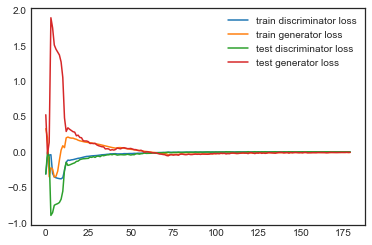

In [46]:
plot_losses(radar_wgan.train_history)

Epoch: 1


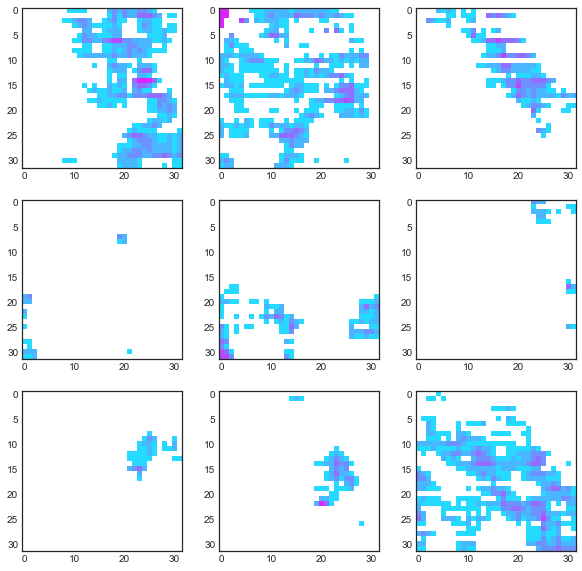

Epoch: 2


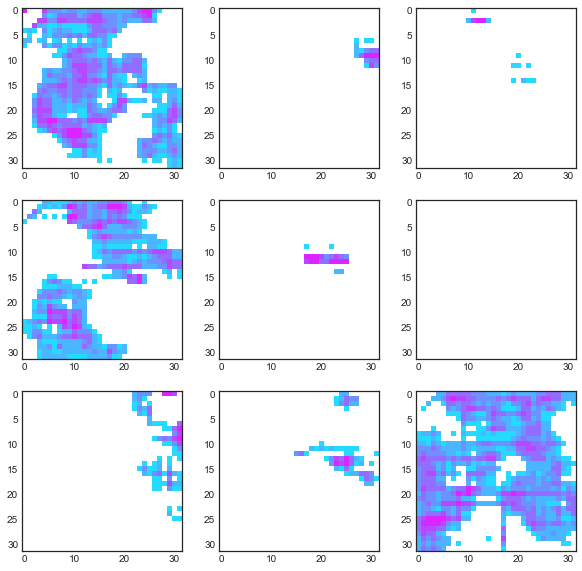

Epoch: 3


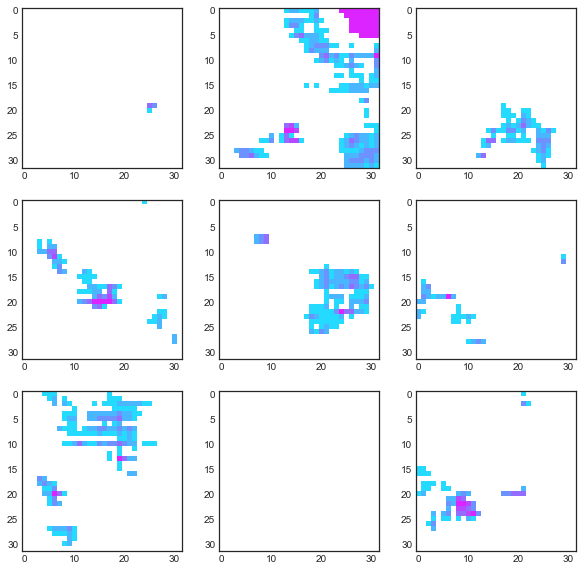

Epoch: 4


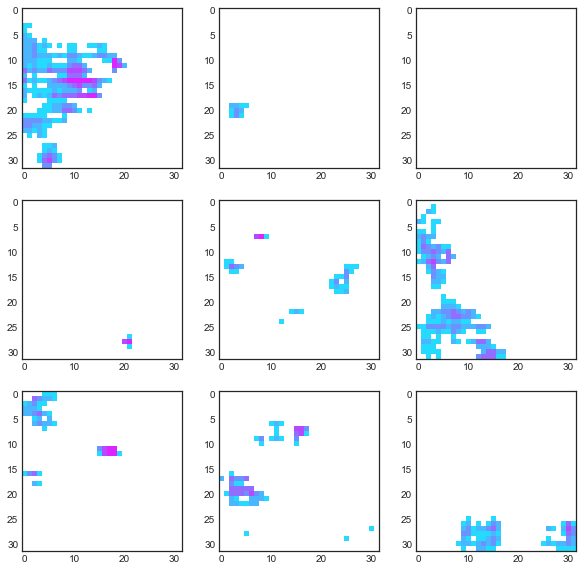

Epoch: 5


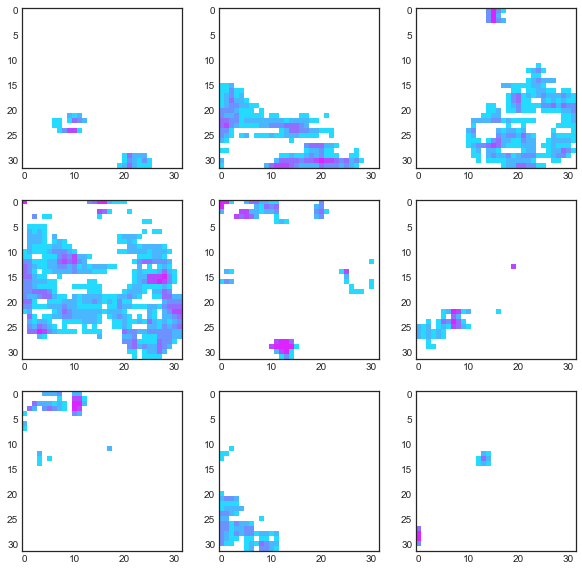

Epoch: 6


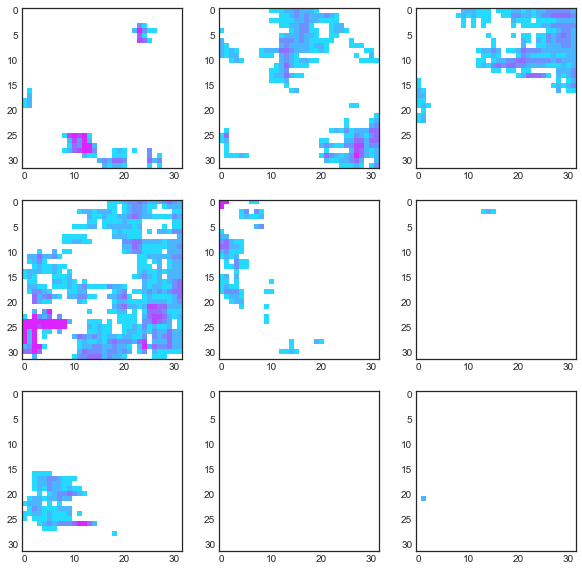

Epoch: 7


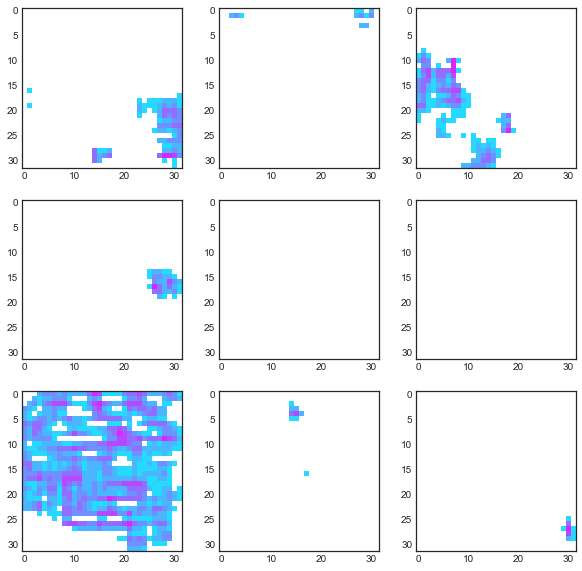

Epoch: 8


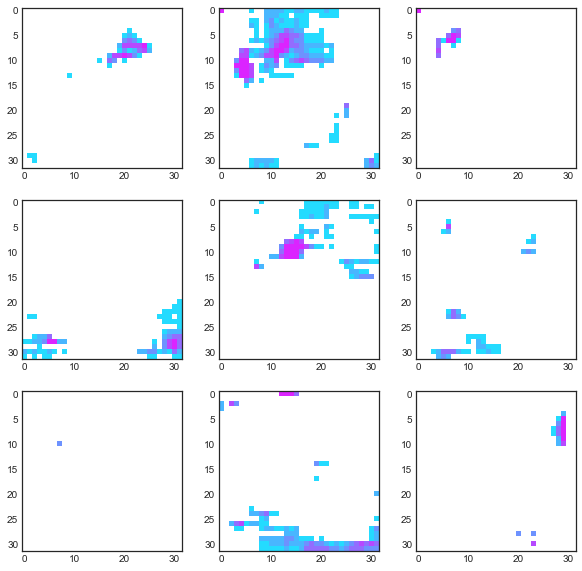

Epoch: 9


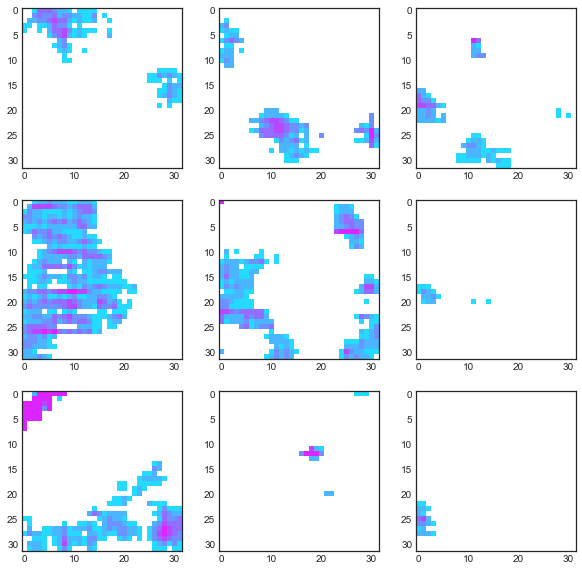

Epoch: 10


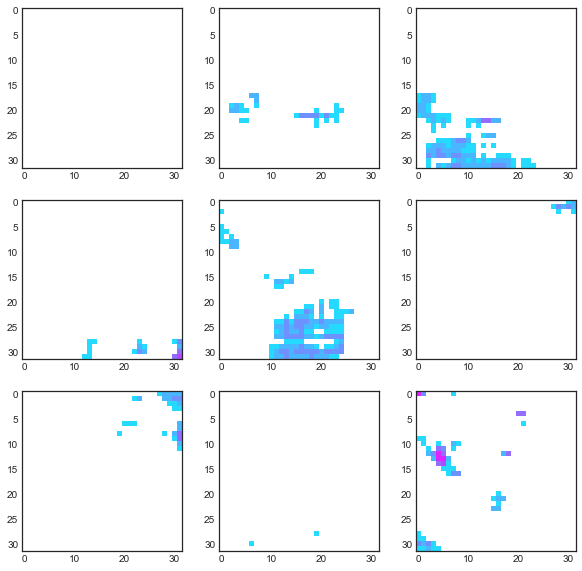

In [47]:
for i, fn in enumerate(sorted(glob('./images/radar2*.npy'))[-10:]):
    print('Epoch:', i + 1)
    plot_stamps(np.squeeze(np.load(fn)), normalize=True)

## Old

In [198]:
G = create_generator(filters=[128, 128, 64], first_conv_size=8, final_activation='sigmoid',
                    final_bias=False)
G.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_72 (InputLayer)        (None, 100)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 8192)              827392    
_________________________________________________________________
reshape_25 (Reshape)         (None, 8, 8, 128)         0         
_________________________________________________________________
up_sampling2d_62 (UpSampling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 16, 16, 128)       409728    
_________________________________________________________________
up_sampling2d_63 (UpSampling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 32, 32, 128)       409728    
__________

/home/s/S.Rasp/repositories/radar-gan/models/models.py:53: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, 2, padding="same", activation="sigmoid", use_bias=False)`
  bias=final_bias)(x)


In [199]:
D = create_discriminator(filters=[128, 128, 64, 64], strides=[2, 2, 2, 2], image_size=64, 
                         activation='LeakyReLU', dr=0.2)
D.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_73 (InputLayer)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 32, 32, 128)       3328      
_________________________________________________________________
dropout_23 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 16, 16, 128)       409728    
_________________________________________________________________
dropout_24 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 8, 8, 64)          204864    
_________________________________________________________________
dropout_25 (Dropout)         (None, 8, 8, 64)          0         
__________

/home/s/S.Rasp/.conda/envs/cbrain_gpu/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [200]:
C = compile_and_create_combined(G, D)

In [201]:
C.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_74 (InputLayer)        (None, 100)               0         
_________________________________________________________________
model_72 (Model)             (None, 64, 64, 1)         1851968   
_________________________________________________________________
model_73 (Model)             (None, 1)                 721409    
Total params: 2,573,377
Trainable params: 1,851,968
Non-trainable params: 721,409
_________________________________________________________________


In [202]:
train_history = train(D, G, C, 8, 100, dataset='radar', normalize_radar=True)

  0%|          | 0/8 [00:00<?, ?it/s]

Number of radar stamps: 6505


100%|██████████| 8/8 [06:02<00:00, 45.26s/it]


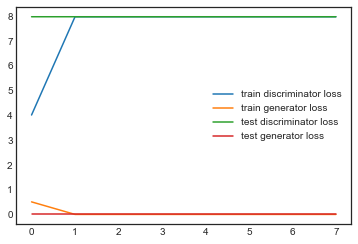

In [203]:
plot_losses(train_history)

Epoch: 1


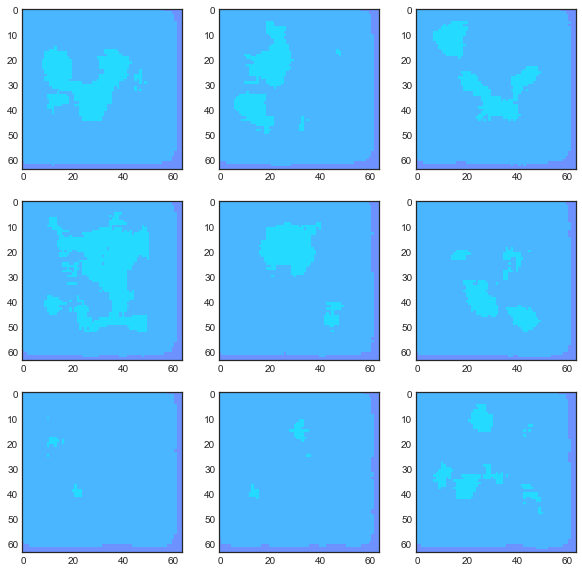

Epoch: 2


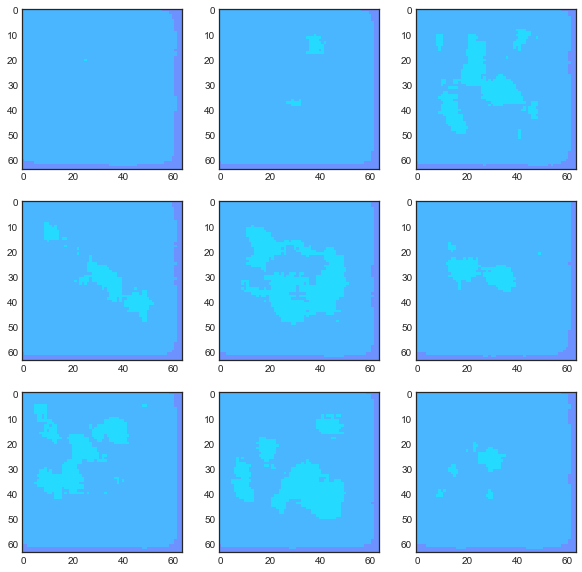

Epoch: 3


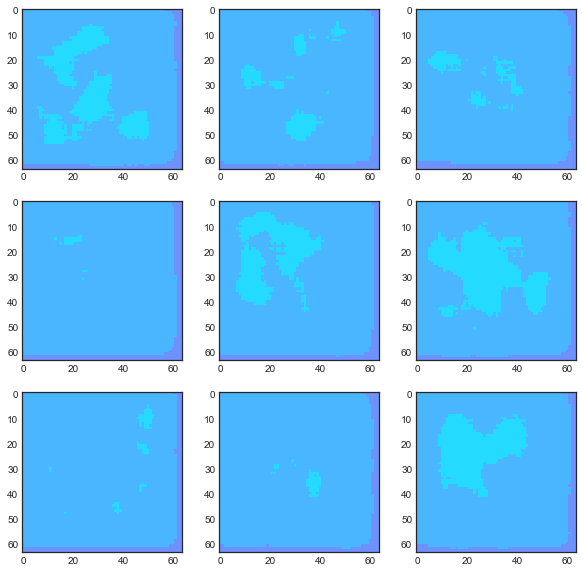

Epoch: 4


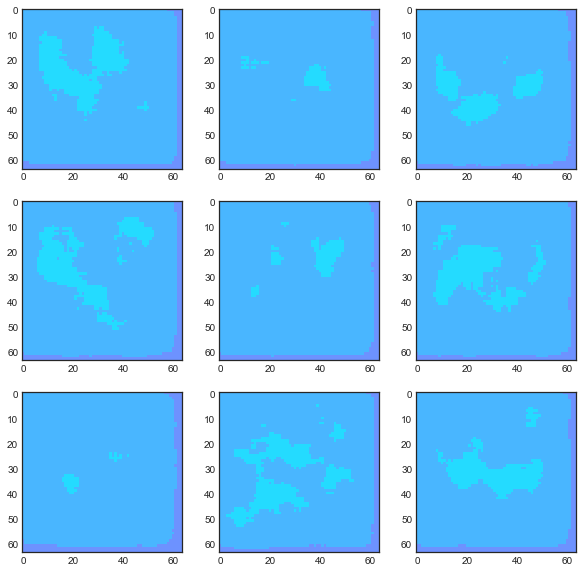

Epoch: 5


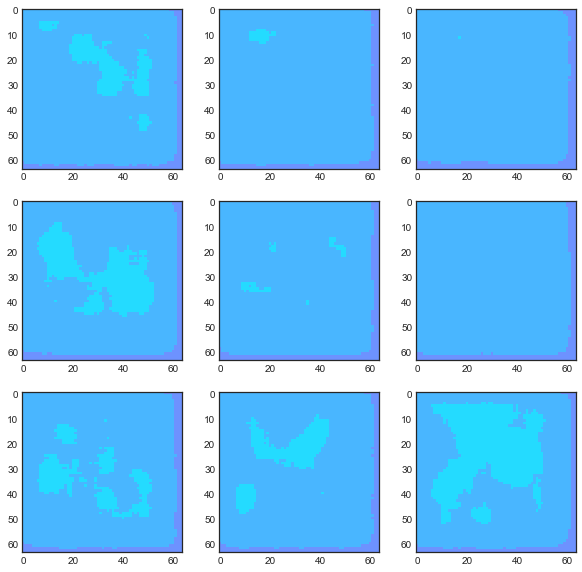

Epoch: 6


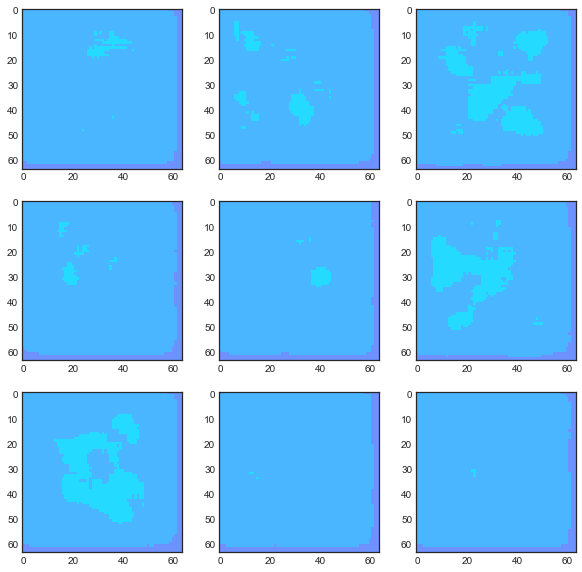

Epoch: 7


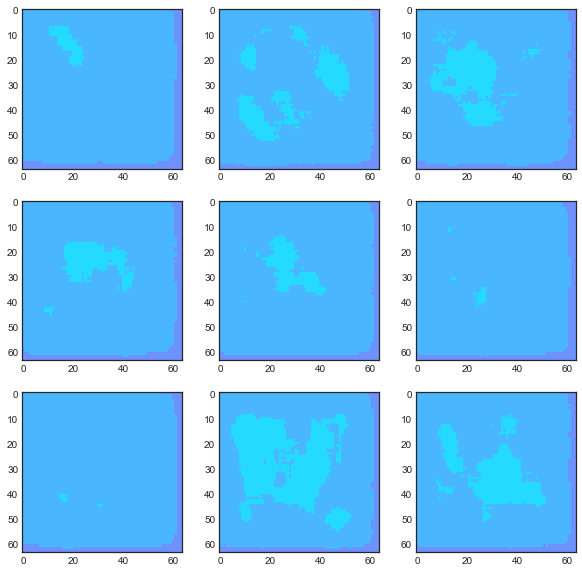

Epoch: 8


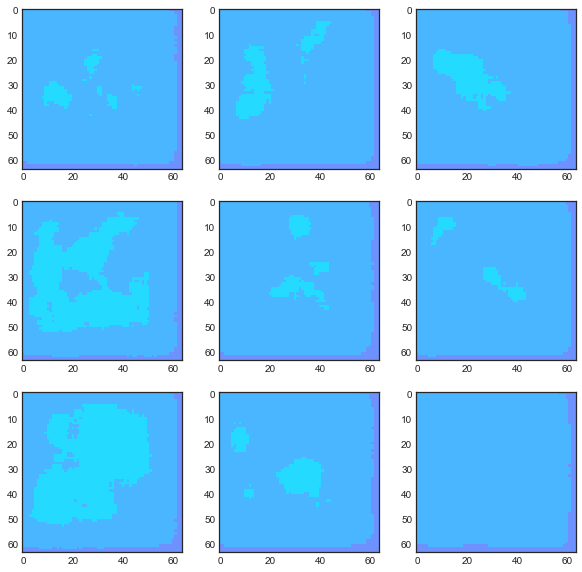

Epoch: 9


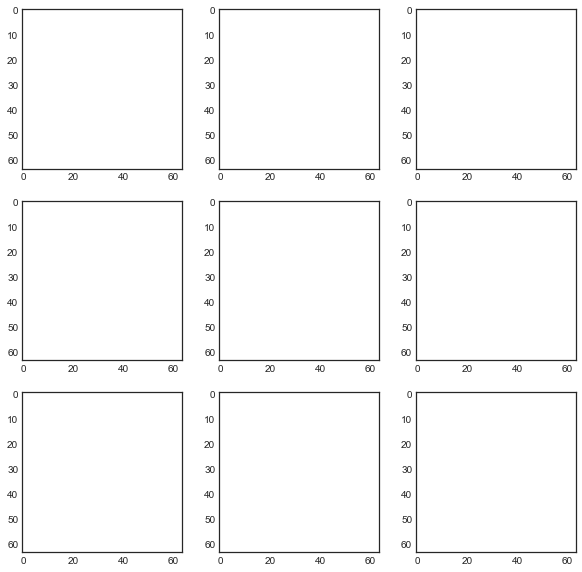

Epoch: 10


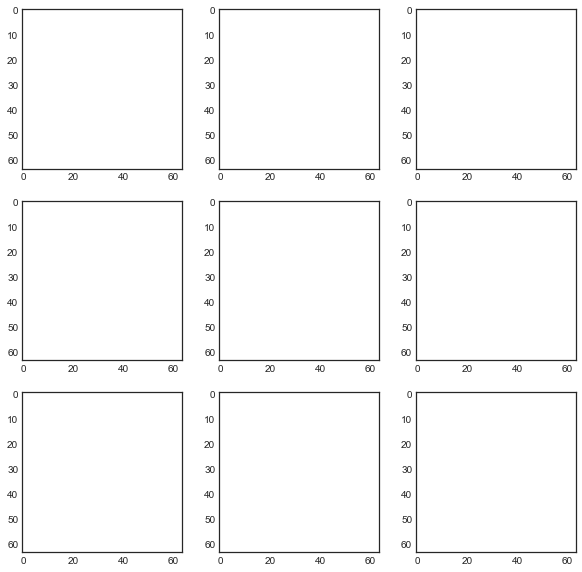

In [204]:
for i, fn in enumerate(sorted(glob('./images/*.npy'))):
    print('Epoch:', i + 1)
    plot_stamps(np.squeeze(np.load(fn)), normalize=True)

In [207]:
real = get_data('radar', normalize=True)

Number of radar stamps: 6505


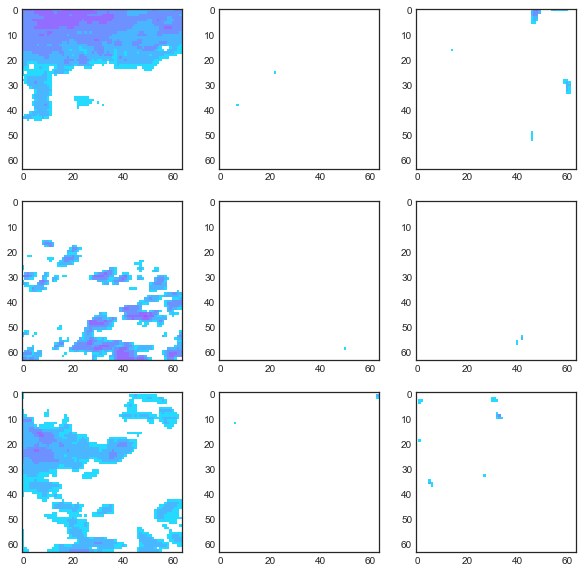

In [208]:
plot_stamps(np.squeeze(real[0][0]), normalize=True)

In [205]:
a = np.squeeze(np.load(sorted(glob('./images/*.npy'))[0]))

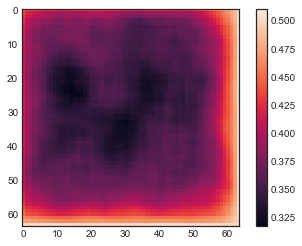

In [206]:
plt.imshow(a[0]);
plt.colorbar()

Epoch: 1


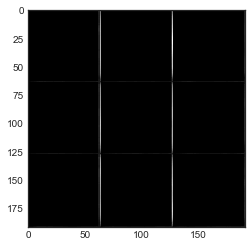

Epoch: 2


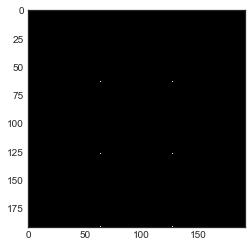

In [116]:
for i, fn in enumerate(sorted(glob('./images/*'))):
    print('Epoch:', i + 1)
    img = Image.open(fn)
    plt.imshow(img, cmap='gray'); plt.show()